Homework is due September 11th at 6:30 PM sharp. Anything submitted after that will receive a 0. Please submit homework to eagovino@ccny.cuny.edu

# A VERY IMPORTANT NOTE ON HOMEWORK.

Homework is graded on 'effort', meaning that you will get full credit if you attempt a question but get an incorrect answer. That said, there are two caveats: 1) if you can't find the answer for the question, write a note in a Markdown cell explaining what you can't find and 2) your notebook must be able to run - meaning that it will run from top to bottom with none of the cells breaking. Before sending to me, go to Kernel up on the dropdown menu and run Restart and Run All to confirm that the code can run successfully.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Answer Questions 1 through 6 of part 6 of the classwork below (I've reloaded the data for you).

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_median_age', header=0)[0]
continents = pd.read_csv('continents.csv')
new_df = df.merge(continents, how='inner', left_on='Country/Territory', right_on='Country(or dependent territory)')
new_df = new_df[['Country/Territory', 'Average(Years)', 'Male(Years)','Female (Years)','Continent']]
new_df['Female_Minus_Male'] = new_df['Female (Years)'] - new_df['Male(Years)'] 

#### 1. Plot the histogram, swarmplot and boxplot of this column. How does this histogram differ from the histogram we saw of the median age above? Are there any outliers?

(array([  2.,   1.,   1.,   3.,  15., 101.,  62.,  24.,   4.,   5.]),
 array([-7.1 , -5.65, -4.2 , -2.75, -1.3 ,  0.15,  1.6 ,  3.05,  4.5 ,
         5.95,  7.4 ]),
 <a list of 10 Patch objects>)

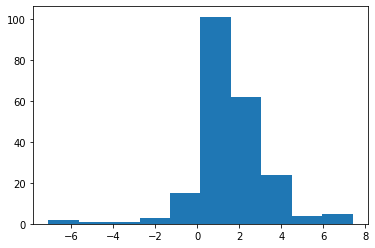

In [3]:
plt.hist(new_df['Female_Minus_Male'])

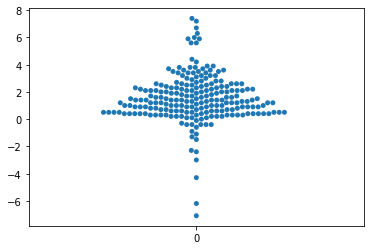

In [4]:
sns.swarmplot(data=new_df['Female_Minus_Male'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a20d96d68>,
 'caps': [<matplotlib.lines.Line2D at 0x1a20da3470>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a20d96978>],
 'medians': [<matplotlib.lines.Line2D at 0x1a20da3b00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a20da3e48>],
 'means': []}

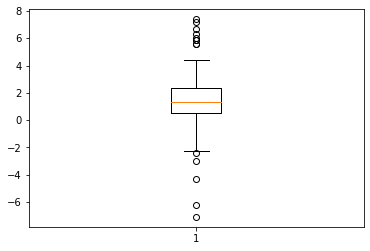

In [5]:
plt.boxplot(x=new_df['Female_Minus_Male'])

This histogram has negative values in the X-Axis whereas the graph with the median does not. This graph also has bell curve whereas the other graph we did in class does not. It seems as if countries with values less than -2.5 and countries with values greater than 4.5 are considered outliers based off the Box Plot.

#### 2. Find the mean, median, variance, standard deviation, maximum, minimum, range, and Interquartile Range of this column.

In [6]:
np.mean(new_df['Female_Minus_Male'])

1.5096330275229353

In [7]:
np.median(new_df['Female_Minus_Male'])

1.3499999999999996

In [8]:
np.var(new_df['Female_Minus_Male'])

3.2246319754229447

In [9]:
np.std(new_df['Female_Minus_Male'])

1.7957260301680056

In [10]:
np.max(new_df['Female_Minus_Male'])

7.399999999999999

In [11]:
np.min(new_df['Female_Minus_Male'])

-7.100000000000001

In [12]:
new_df['Female_Minus_Male'].quantile(0.75) - new_df['Female_Minus_Male'].quantile(0.25)

1.875

#### 3. Which country has the longest lifespan for females compared to males? Which country has the longest lifespan for males compared to females? Which countries are outliers? What constitutes the cutoff for an outlier in this case?

In [13]:
np.max(new_df['Female (Years)'])
new_df[new_df['Female (Years)'] == np.max(new_df['Female (Years)'])]

,Country/Territory,Average(Years),Male(Years),Female (Years),Continent,Female_Minus_Male
130,Monaco,53.1,51.7,54.5,Europe,2.8


In [14]:
np.max(new_df['Male(Years)'])
new_df[new_df['Male(Years)'] == np.max(new_df['Male(Years)'])]

,Country/Territory,Average(Years),Male(Years),Female (Years),Continent,Female_Minus_Male
130,Monaco,53.1,51.7,54.5,Europe,2.8


In [15]:
maxCutOff = np.percentile(new_df['Female_Minus_Male'], q=75) + (np.percentile(new_df['Female_Minus_Male'], q=75) - np.percentile(new_df['Female_Minus_Male'], q=25)) * 1.5
print(maxCutOff)

5.1875


In [16]:
new_df[new_df['Female_Minus_Male'] >= maxCutOff]

,Country/Territory,Average(Years),Male(Years),Female (Years),Continent,Female_Minus_Male
18,Belarus,40.0,37.1,43.1,Europe,6.0
60,Estonia,42.7,39.4,46.1,Europe,6.7
68,Georgia,38.1,35.3,40.9,Asia,5.6
69,Georgia,38.1,35.3,40.9,Europe,5.6
109,Latvia,43.6,39.7,46.9,Europe,7.2
115,Lithuania,43.7,39.7,47.1,Europe,7.4
160,Russia,39.6,36.6,42.5,Asia,5.9
161,Russia,39.6,36.6,42.5,Europe,5.9
204,Ukraine,40.6,37.4,43.7,Europe,6.3


In [17]:
minCutOff = np.percentile(new_df['Female_Minus_Male'], q=25) - (np.percentile(new_df['Female_Minus_Male'], q=75) - np.percentile(new_df['Female_Minus_Male'], q=25)) * 1.5
print(minCutOff)

-2.3125


In [18]:
new_df[new_df['Female_Minus_Male'] <= minCutOff]

,Country/Territory,Average(Years),Male(Years),Female (Years),Continent,Female_Minus_Male
15,Bahrain,32.3,33.8,29.5,Asia,-4.3
106,Kuwait,29.3,30.4,27.4,Asia,-3.0
147,Oman,25.6,26.6,24.2,Asia,-2.4
158,Qatar,33.2,34.3,28.1,Asia,-6.2
205,United Arab Emirates,30.3,32.1,25.0,Asia,-7.1


Monaco has the longest lifespan in both females and males. In this case, any country that has a value greater than 5.1875 or a value of -2.3125 in the Female_Minus_Maleis column is considered an outlier. The countries which are outliers are Belarus, Estonia, Georgia(Europe), Georgia(Asia), Latvia, Lithuania, Russia(Asia), Russia(Europe), Ukraine, Bahrain, Kuwait, Oman, Qatar, and United Arab Emirates.

#### 4. Find the mean, median, and standard deviation of the data grouped by continent. Which continent has the highest absolute difference between its mean and median? What does the difference between mean and median say about the distribution of values for that continent?

In [19]:
new_df.groupby('Continent')['Female_Minus_Male'].mean()

Continent
Africa           0.798000
Asia             0.814583
Europe           3.003704
North America    1.406061
Oceania          1.028571
South America    1.658333
Name: Female_Minus_Male, dtype: float64

In [20]:
new_df.groupby('Continent')['Female_Minus_Male'].median()

Continent
Africa           0.60
Asia             1.20
Europe           2.65
North America    1.10
Oceania          1.00
South America    1.50
Name: Female_Minus_Male, dtype: float64

In [21]:
new_df.groupby('Continent')['Female_Minus_Male'].std()

Continent
Africa           0.685265
Asia             2.417577
Europe           1.654378
North America    1.398200
Oceania          0.863796
South America    0.862827
Name: Female_Minus_Male, dtype: float64

In [22]:
meanArr = new_df.groupby('Continent')['Female_Minus_Male'].mean()
medianArr = new_df.groupby('Continent')['Female_Minus_Male'].median()
maxValue = 0
maxContinent = "Africa"
for index, value in enumerate(meanArr):
    if(abs(value - medianArr[index]) > maxValue):
        maxValue = abs(value - medianArr[index])
        maxContinent =  (new_df.groupby('Continent')['Female_Minus_Male'].mean() == value)
print(maxValue)
print(maxContinent)

0.3854166666666655
Continent
Africa           False
Asia              True
Europe           False
North America    False
Oceania          False
South America    False
Name: Female_Minus_Male, dtype: bool


According to the calculations, it seems like Asia has the highest absolute difference between its mean and median. This means that the graph will be skewed if drawn.

#### 5. Plot a swarmplot and boxplot of the data grouped by continent.

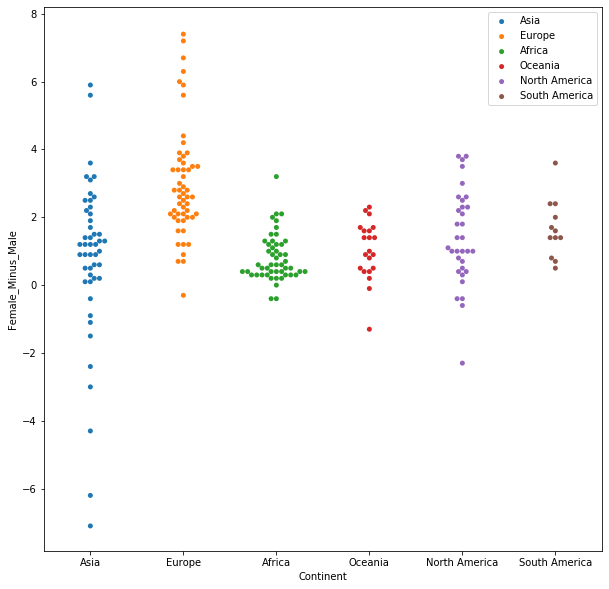

In [23]:
fig = plt.figure(figsize=(10,10))
sns.swarmplot(x='Continent', y='Female_Minus_Male', data=new_df)
plt.gca().legend(new_df['Continent'].unique())

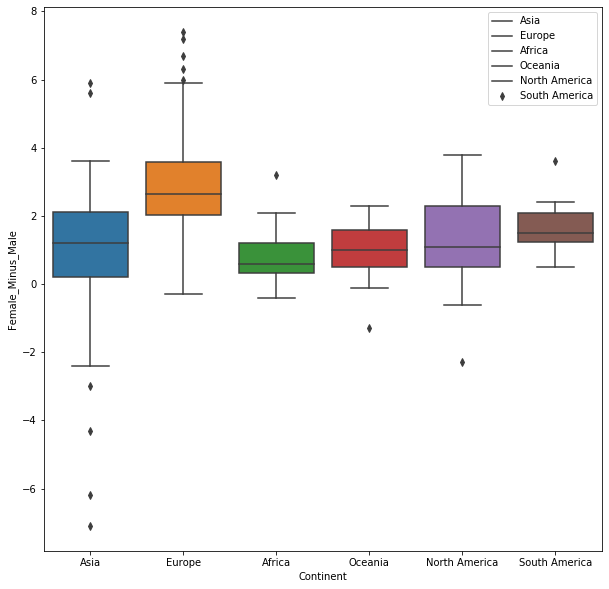

In [24]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x='Continent', y='Female_Minus_Male', data=new_df)
plt.gca().legend(new_df['Continent'].unique())

#### 6. Given your observations from the previous two questions, what may be a cause of why the continent with the largest spread is that way? Hint: Look at the outliers for that country.

The continent with the largest spread is Asia. The reason why it has the spread that way may be because of the outliers, it has outliers in both direction and has a lot of them.

### 2. Answer Questions 1 through 10 from [here](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset) below (please copy and paste each question into its own cell with answers below it).

In [25]:
#AdultDataSet
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
df.columns = ['age', 'workingclass', 'fnlwgt', 'education', 'education-num', 'martial-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']
df['salary'] = df['salary'].str.strip()
df['native-country'] = df['native-country'].str.strip()

#### 1. How many men and women (sex feature) are represented in this dataset?

In [26]:
df['sex'].value_counts()

 Male      21789
 Female    10771
Name: sex, dtype: int64

There are 21789 men and 10771 women represented in this data set. 

#### 2. What is the average age (age feature) of women?

In [27]:
df[df['sex'] == " Female"]['age'].mean()

36.85823043357163

The average age of women is 36.

#### 3. What is the percentage of German citizens (native-country feature)?

In [28]:
df['native-country'].value_counts(normalize=True)

United-States                 0.895854
Mexico                        0.019748
?                             0.017905
Philippines                   0.006081
Germany                       0.004208
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003256
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                

The percentage of German citizens is 0.4208%. 

#### 4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature) and those who earn less than 50K per year?

In [29]:
greaterThan50K = df[df['salary'] == ">50K"]
greaterThan50K['age'].mean()

44.24984058155847

In [30]:
greaterThan50K['age'].std()

10.51902771985177

In [31]:
lessThan50K = df[df['salary'] == "<=50K"]
lessThan50K['age'].mean()

36.78364820583357

In [32]:
lessThan50K['age'].std()

14.020365001830326

The mean for those who earn more than 50K per year is 44 and the standard deviation is 10.5. The mean for those who earn less than 50K per year is 36 and the standard deviation is 14.

#### 6. Is it true that people who earn more than 50K have at least high school education? (education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)

In [33]:
greaterThan50K['education'].value_counts()

 Bachelors       2221
 HS-grad         1675
 Some-college    1387
 Masters          959
 Prof-school      423
 Assoc-voc        361
 Doctorate        306
 Assoc-acdm       265
 10th              62
 11th              60
 7th-8th           40
 12th              33
 9th               27
 5th-6th           16
 1st-4th            6
Name: education, dtype: int64

No this is not true. As we can see there are some people who earn more than 50k and don't have at least high school education.

#### 7. Display age statistics for each race (race feature) and each gender (sex feature). Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.

In [34]:
df.groupby('race')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
Amer-Indian-Eskimo,311.0,37.173633,12.447130,17.0,28.0,35.0,45.5,82.0
Asian-Pac-Islander,1039.0,37.746872,12.825133,17.0,28.0,36.0,45.0,90.0
Black,3124.0,37.767926,12.759290,17.0,28.0,36.0,46.0,90.0
Other,271.0,33.457565,11.538865,17.0,25.0,31.0,41.0,77.0
White,27815.0,38.769872,13.782554,17.0,28.0,37.0,48.0,90.0


In [35]:
df.groupby('sex')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,10771.0,36.858230,14.013697,17.0,25.0,35.0,46.0,90.0
Male,21789.0,39.433567,13.370937,17.0,29.0,38.0,48.0,90.0


In [36]:
df.groupby(["race", "sex"]).max()

age  workingclass   fnlwgt      education  \
race                sex                                                  
 Amer-Indian-Eskimo  Female   80     State-gov   445168   Some-college   
                     Male     82     State-gov   356015   Some-college   
 Asian-Pac-Islander  Female   75     State-gov   379046   Some-college   
                     Male     90   Without-pay   506329   Some-college   
 Black               Female   90     State-gov   930948   Some-college   
                     Male     90   Without-pay  1268339   Some-college   
 Other               Female   74     State-gov   388741   Some-college   
                     Male     77     State-gov   481175   Some-college   
 White               Female   90   Without-pay  1484705   Some-college   
                     Male     90   Without-pay  1455435   Some-college   

                             education-num martial-status         occupation  \
race                sex                                                        
 Amer-Indian-Eskimo  Female             16        Widowed   Transport-moving   
                     Male               16        Widowed   Transport-moving   
 Asian-Pac-Islander  Female             15        Widowed   Transport-moving   
                     Male               16        Widowed   Transport-moving   
 Black               Female             16        Widowed   Transport-moving   
                     Male               16        Widowed   Transport-moving   
 Other               Female             14        Widowed       Tech-support   
                     Male               16        Widowed   Transport-moving   
 White               Female             16        Widowed   Transport-moving   
                     Male               16        Widowed   Transport-moving   

                            relationship  capital-gain  capital-loss  \
race                sex                                                
 Amer-Indian-Eskimo  Female         Wife         15024          1721   
                     Male      Unmarried         27828          1980   
 Asian-Pac-Islander  Female         Wife         99999          2258   
                     Male      Unmarried         99999          2457   
 Black               Female         Wife         99999          4356   
                     Male      Unmarried         99999          2824   
 Other               Female         Wife          7688          1740   
                     Male      Unmarried         99999          2179   
 White               Female         Wife         99999          4356   
                     Male           Wife         99999          3770   

                             hours-per-week native-country salary  
race                sex                                            
 Amer-Indian-Eskimo  Female              84  United-States   >50K  
                     Male                84  United-States   >50K  
 Asian-Pac-Islander  Female              99        Vietnam   >50K  
                     Male                99        Vietnam   >50K  
 Black               Female              99  United-States   >50K  
                     Male                99  United-States   >50K  
 Other               Female              65  United-States   >50K  
                     Male                98  United-States   >50K  
 White               Female              99     Yugoslavia   >50K  
                     Male                99     Yugoslavia   >50K

The maximum age of men of Amer-Indian-Eskimo race is 82.

#### 8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (marital-status feature)? Consider as married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.

In [37]:
married=[" Married-civ-spouse", " Married-spouse-absent"," Married-AF-spouse"]
greaterThan50K["martial-status"].isin(married).value_counts()

True     6736
False    1105
Name: martial-status, dtype: int64

#### 9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?

In [38]:
maxHours = df['hours-per-week'].max()

In [39]:
maxHoursPerWeek = df[df['hours-per-week'] == maxHours]
maxHoursPerWeek.shape[0]

85

In [40]:
maxHoursPerWeek['salary'].value_counts(normalize=True)

<=50K    0.705882
>50K     0.294118
Name: salary, dtype: float64

The maximum number of hours a person works per week is 99. 85 people work such number of hours and the percentage of those who earn a lot (>50K) among them is 29.4%.

#### 10. Count the average time of work (hours-per-week) for those who earn a little and a lot (salary) for each country (native-country). What will these be for Japan?

In [41]:
lessThan50K.groupby('native-country')['hours-per-week'].mean()

native-country
?                             40.164760
Cambodia                      41.416667
Canada                        37.914634
China                         37.381818
Columbia                      38.684211
Cuba                          37.985714
Dominican-Republic            42.338235
Ecuador                       38.041667
El-Salvador                   36.030928
England                       40.483333
France                        41.058824
Germany                       39.139785
Greece                        41.809524
Guatemala                     39.360656
Haiti                         36.325000
Holand-Netherlands            40.000000
Honduras                      34.333333
Hong                          39.142857
Hungary                       31.300000
India                         38.233333
Iran                          41.440000
Ireland                       40.947368
Italy                         39.625000
Jamaica                       38.239437
Japan                    

In [42]:
greaterThan50K.groupby('native-country')['hours-per-week'].mean()

native-country
?                     45.547945
Cambodia              40.000000
Canada                45.641026
China                 38.900000
Columbia              50.000000
Cuba                  42.440000
Dominican-Republic    47.000000
Ecuador               48.750000
El-Salvador           45.000000
England               44.533333
France                50.750000
Germany               44.977273
Greece                50.625000
Guatemala             36.666667
Haiti                 42.750000
Honduras              60.000000
Hong                  45.000000
Hungary               50.000000
India                 46.475000
Iran                  47.500000
Ireland               48.000000
Italy                 45.400000
Jamaica               41.100000
Japan                 47.958333
Laos                  40.000000
Mexico                46.575758
Nicaragua             37.500000
Peru                  40.000000
Philippines           43.032787
Poland                39.000000
Portugal              41.

In [43]:
greaterThan50K[greaterThan50K['native-country'] == "Japan"]['hours-per-week'].mean()

47.958333333333336

In [44]:
lessThan50K[lessThan50K['native-country'] == "Japan"]['hours-per-week'].mean()

41.0

The average time of work (hours-per-week) for those who earn a little in Japan is 47.95 and for those who earn a lot is 41.